# Week 4B: Pivoting

<font color='blue'><b>Goals of this notebook:</b></font> Implement the exchange step as a function, then apply it to solve a sample problem.

## Task 1: Implementing a pivoting function

For this task, we need to deal with matrices using a new module called `numpy`. If you are not familiar with `numpy`, please refer to the workbook "Week 4A: Introduction to numpy".

We are given the following LP in canonical form:

$$\begin{equation}
\begin{array} {l@{}r@{}r@{}r@{}r@{}r@{}r@{}} \\
  \text{max}  & z = &4x_1    & + &9x_2  &       &  \\
  \text{subject  to:} 
                  & &x_1     & + &4x_2   & \leq  &40\\
                  & &2x_1    & + & x_2   & \leq  &42\\
                  & &1.5x_1  & + &3x_2   & \leq  &36\\
                  & &x_1     &   &       & \geq  &0 \\
                  & &        &   &x_2    & \geq  &0 \\
\end{array}
\end{equation}$$


Our task is to implement a function that performs a pivoting step on the element in the $i$-th row and $k$-th column of the tableau $T$. To get the tableau $T$, we first need to convert the LP into standard form:


$$\begin{equation}
\begin{array} {l@{}r@{}r@{}r@{}r@{}r@{}r@{}} \\
  \text{max}    & z=       &    & &    & &    & &4 x_1   &+ &9 x_2  &       &  \\
  \text{subject to:}  
                & &y_1 &+&    & &    & &x_1     &+ &4 x_2   & =     &40\\
                & &    & &y_2 &+&    & &2x_1    &+ & x_2    & =     &42\\
                & &    & &    & &y_3 &+&1.5x_1  &+ &3x_2    & =     &36\\
                & &    & &    & &    & &x_1     &  &        & \geq  &0 \\
                & &    & &    & &    & &        &  &x_2     & \geq  &0 \\
                & &y_1 & &    & &    & &        &  &        & \geq  &0 \\
                & &    & &y_2 & &    & &        &  &        & \geq  &0 \\
                & &    & &    & &y_3 & &        &  &        & \geq  &0 \\
\end{array}
\end{equation}$$

Then we can construct the tableau $T$:

$$\begin{equation}
\begin{array}{l|rrrrr|r}
  & y_1 & y_2 & y_3 & x_1 & x_2 & 1\\
  \hline
z & 0 & 0 & 0 & -4 & -9 & 0\\
  \hline
  & 1 & 0 & 0 & 1 & 4 & 40\\
  & 0 & 1 & 0 & 2 & 1 & 42\\
  & 0 & 0 & 1 & 1.5 & 3 & 36
\end{array}
\end{equation}$$

### Step 1: Initializing the tableau

First, we need to import the module `numpy`, then write down the initial tableau $T$ as a matrix. 

In [3]:
# Import the module
import numpy as np

# Define the initial tableau
T = np.matrix([
    [0., 0., 0., -4., -9.,  0.],
    [1., 0., 0.,  1.,  4., 40.],
    [0., 1., 0.,  2.,  1., 42.],
    [0., 0., 1., 1.5,  3., 36.]
])

### Step 2: Implementing the exchange function

As in the lecture notes, below are the formula for computing the entries of the new tableau. Suppose we perform a pivoting step at the $(i,k)$-th entry of the current tableau. Then the tableau is getting updated by the following rule:

$$\begin{equation}
\begin{array}
((i) & a'_{il} = \frac{a_{il}}{a_{ik}} & l=1,...,n+m &\\
(ii) & a'_{jl} = a_{jl} - \frac{ a_{jk}a_{il}}{a_{ik}} & l=1,...,n+m & j \neq i, j=1,...,m
\end{array}
\end{equation}$$

Your task is to write a function that takes an arbitrary tableau $T$, and output the resulting tableau after pivoting at the $(i,k)$-th entry. The input will be the triplet $(T,i,k)$.

*Note: In `numpy`, the entries of a matrix start counting from 0, but when we say pivoting at a certain entry, we count from 1. As an example, the $(3,4)$ entry of the tableau $T$ is $2$. In `numpy`, this entry corresponds to `T[2,3]`, not `T[3,4]`.*


In [4]:
# Implement your function here
def pivot(T,i,k):
    # Create a copy of the tableau so that the original one is untouched
    T_pivot = np.zeros_like(T, dtype=float)  # initialize the output
    
    # Step (i)
    # We divide the i-th row elementwise by the value of a_ik
    T_pivot[i,:] = T[i,:] / T[i,k]
    
    # Step (ii)
    # We compute the new value for each item in the new tableau T_pivot
    for l in range(0, T.shape[1]):
        for j in range(0, T.shape[0]):
            if(j != i):
                T_pivot[j,l] = T[j,l] - T[j,k] * T[i,l] / T[i,k]

    
    return T_pivot


_Remark_: The function we implemented above returns a new tableau. Therefore when using it, we need to store the resulting tableau in a new matrix.

### Step 3: Testing

To see if your implementation works correctly, you can compare it with the result you get by hand. Let's test your function by pivoting at the $(3,5)$ entry of the initial tableau $T$. The $(3,5)$ entry corresponds to the intersection of the third row (the second constraint) and the $x_2$ column.

In [14]:
# Pivoting at (3,5) entry using the function you just implemented and compare your results
print(T)

T_test = pivot(T,2,4)
print(T_test)

[[ 0.   0.   0.  -4.  -9.   0. ]
 [ 1.   0.   0.   1.   4.  40. ]
 [ 0.   1.   0.   2.   1.  42. ]
 [ 0.   0.   1.   1.5  3.  36. ]]
[[   0.     9.     0.    14.     0.   378. ]
 [   1.    -4.     0.    -7.     0.  -128. ]
 [   0.     1.     0.     2.     1.    42. ]
 [   0.    -3.     1.    -4.5    0.   -90. ]]


You can compare your result above with what you got by solving by hands, or you can directly check it with the following matrix:

$$\begin{equation}
\begin{array}{l|rrrrr|r}
  & y_1 & y_2 & y_3 & x_1 & x_2 & 1\\
  \hline
z & 0 & 9 & 0 & 14 & 0 & 378\\
\hline
  & 1 & -4 & 0 & -7 & 0 & -128\\
  & 0 & 1 & 0 & 2 & 1 & 42\\
  & 0 & -3 & 1 & -4.5 & 0 & -90
\end{array}
\end{equation}$$


To make our tableau easier to read, we can add a header `header1` and adjust the printing format using `np.set_printoptions()`.

In [16]:
# Adjust the printing format
np.set_printoptions(
    formatter={'str_kind': lambda x: '{:^7}'.format(x),
               'float': lambda x: '{: ^7.3g}'.format(x)})

# Add a header
header1 = np.array(['y1','y2','y3','x1','x2','1'])
print("", header1)
print(T_test)

 [  y1      y2      y3      x1      x2       1   ]
[[   0       9       0      14       0      378  ]
 [   1      -4       0      -7       0     -128  ]
 [   0       1       0       2       1      42   ]
 [   0      -3       1     -4.5      0      -90  ]]


## Task 2: Solving an LP using pivoting

You can solve a linear program by pivoting multiple times until there are no negative values on the first row. You can follow the steps below to obtain and verify the optimal solution for the LP.

### Step 1: Using the pivoting function you created to solve the LP

In particular, you should first pivot on the $(2,5)$ entry, then on the $(4,4)$ entry.

In [20]:
# Pivot the tableau T twice using the given hint

T_2 = pivot(T,1,4)

print("Tableau after the first pivot:")
print("", header1)
print(T_2)

T_3 = pivot(T_2,3,3)

print("Tableau after the second pivot:")
print("", header1)
print(T_3)

print("Solution obtained manually:")
print("Objective: " + str(T_3[0,5]))
print("x1 = " + str(T_3[3,5]))
print("x2 = " + str(T_3[1,5]))

Tableau after the first pivot:
 [  y1      y2      y3      x1      x2       1   ]
[[ 2.25      0       0     -1.75     0      90   ]
 [ 0.25      0       0     0.25      1      10   ]
 [ -0.25     1       0     1.75      0      32   ]
 [ -0.75     0       1     0.75      0       6   ]]
Tableau after the second pivot:
 [  y1      y2      y3      x1      x2       1   ]
[[  0.5      0     2.33      0       0      104  ]
 [  0.5      0    -0.333     0       1       8   ]
 [  1.5      1     -2.33     0       0      18   ]
 [  -1       0     1.33      1       0       8   ]]
Solution obtained manually:
Objective: 104.0
x1 = 8.0
x2 = 8.0


After the two steps, you should see that all values in the first row are non-negative. Therefore, any further exchange step would not increase the objective value. This indicates that you have already found the optimal solution and the optimal value of the LP.

Next, let's check our solution by comparing it with the result solved by `PuLP`.

### Step 2: Using `PuLP` to check your solutions

In [ ]:
# Use PuLP to solve the same LP and compare the results

import pulp

# Create the LP
Lp1 = '???'

# Create the variables
'???'

# Add the objective function
'???'

# Add the constraints
'???'

Lp1.solve()
print("Solution obtained with pulp:")
# Print out the optimal objective value of my_lp
print("Objective: " + str(Lp1.objective.value()))
# Print out optimal vertex.
for v in Lp1.variables():
    print(str(v) + " = " + str(v.value()))

## Task 3: Visualizing pivoting in a 2D example

Now that you have implemented a function that can automatically perform the pivoting step for you, it will be helpful to visualize the steps and understand the process better. Remember, pivoting is nothing but a tool to systematically explore the vertices of the feasible region, which is a polyhedron. 

Below is an example to illustrate how each step of pivoting takes you from one vertex to another. Consider the following LP:


$$\begin{equation}
\begin{array}{l@{}r@{}r@{}r@{}r@{}r@{}r@{}} \\
\text{max}    &z=  &x  &+ &y     &       &  \\
\text{subject  to:}
                &  &x  &  &      & \leq  &3 \\
                &  &2x &+ &y     & \leq  &7 \\
                &  &x  &+ &2y    & \leq  &8 \\
                &  &x  &  &      & \geq  &0 \\
                &  &   &  &y     & \geq  &0 \\
\end{array}
\end{equation}$$

**In this example, we will ignore the objective function and only focus on the feasible region defined by the constraints.**

In [1]:
import pulp

Lp2 = pulp.LpProblem("My_LP", pulp.LpMaximize)

x = pulp.LpVariable('x', lowBound=0, cat=pulp.LpContinuous)
y = pulp.LpVariable('y', lowBound=0, cat=pulp.LpContinuous)

Lp2 += x + y

Lp2 += x <= 3
Lp2 += 2*x + y <= 7
Lp2 += x + 2*y <= 8

You can view the feasible region of the above LP by running the following codes. It has 5 vertices, namely, $(0,0),(3,0),(3,1),(2,3),(0,4)$.

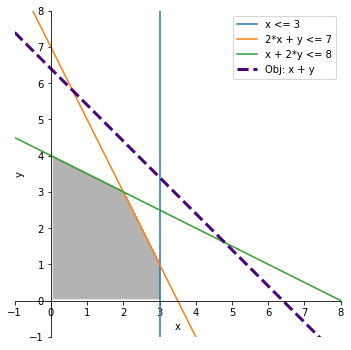

In [2]:
%matplotlib inline
from plotLP import *  
plotLP(Lp2, x_lower=-1, x_upper=8, y_lower=-1, y_upper=8)

### Step 1: Initializing

The very first step is to write the LP in its standard form. The resulting tableau is:

$$T_0=\begin{equation}
\begin{array}{rrrrr|r}
  x & y & s_1 & s_2 & s_3 & 1\\
 \hline
  1 & 0 & 1 & 0 & 0 & 3\\
  2 & 1 & 0 & 1 & 0 & 7\\
  1 & 2 & 0 & 0 & 1 & 8
\end{array}
\end{equation}$$

Correspondingly, we initialize the tableau `T0` in Python in the code below.

In [3]:
# Add a header
header2 = np.array(['x','y','s1','s2','s3','1']) 

# Intialize T0
T0 = np.matrix([
    [1., 0., 1.,  0.,  0.,  3.],
    [2., 1., 0.,  1.,  0.,  7.],
    [1., 2., 0.,  0.,  1.,  8.]
])

# Print the header and T0
print("", header2)
print(T0)

 [   x       y      s1      s2      s3       1   ]
[[   1       0       1       0       0       3   ]
 [   2       1       0       1       0       7   ]
 [   1       2       0       0       1       8   ]]


Both $x,y$ are non-basic variables, so they have value 0. Hence, the initial tableau $T_0$ corresponds to the point $(0,0)$, which is the lower left vertex of the feasible region. We can use the function `plotVert(T)` imported from `plotLP.py` to show the vertex corresponding to the solution of the current tableau. It is shown as a red dot in the graph below.

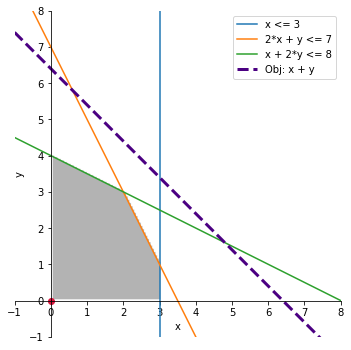

In [4]:
plotLP(Lp2, x_lower=-1, x_upper=8, y_lower=-1, y_upper=8)
plotVert(T0)

### Step 2: Pivoting
Next, we perform a pivoting step at the $(1,1)$ entry using the pivoting function we just created.

In [ ]:
T1 = pivot(T0,0,0)
print("", header2)
print(T1)

We can now read off from the new tableau that after the first pivoting step, $x$ becomes a basic variable, which has value 3; while $y$ is still non-basic, so $y=0$. Hence, we arrive at the vertex $(3,0)$, as shown in the graph below. Again, we use `plotVert(T)` to visualize the vertex. The optional argument `past_T` takes in a list of tableaus that we have created in the past, and their corresponding vertices are shown as blue dots in the graph.

In [ ]:
plotLP(Lp2, x_lower=-1, x_upper=8, y_lower=-1, y_upper=8)
plotVert(T1, past_T=[T0])

### Step 3: Pivoting continued
In the next step, we continue pivoting at the $(2,2)$ entry.

In [ ]:
T2 = pivot(T1,1,1)
print("", header2)
print(T2)

From this tableau, we can see that now both $x,y$ are basic variables, so we can read off their values directly from the tableau, which are 3 and 1 respectively. Hence, we've moved to the vertex $(3,1)$.

In [ ]:
plotLP(Lp2, x_lower=-1, x_upper=8, y_lower=-1, y_upper=8)
plotVert(T2, past_T=[T0,T1])

We continue with pivoting at the $(3,3)$ entry to explore further:

In [ ]:
T3 = pivot(T2,2,2)
print("", header2)
print(T3)

After this pivoting step, $x,y$ are still basic variables, but their value changes as one can read from the right hand side of the tableau. It now takes us to the $(2,3)$ vertex. We almost finish exploring all the vertices.

In [ ]:
plotLP(Lp2, x_lower=-1, x_upper=8, y_lower=-1, y_upper=8)
plotVert(T3, past_T=[T0,T1,T2])

At this step, one can check that we have already arrived at the optimal solution $(2,3)$. So if we aim at optimizing the objective function $x+y$, we can stop here. 

Nonetheless, we can still perform further pivoting steps just to explore all the possible vertices. So we pivot one last time at $(1,4)$ entry:

In [ ]:
T4 = pivot(T3,0,3)
print("", header2)
print(T4)

We can see that by pivoting at the $(1,4)$ entry, $x$ is no longer a basic variable, while $y$ remains. The current tableau corresponds to the vertex $(0,4)$. So we have successfully explored all the five vertices of the polygon using our pivoting function.

In [ ]:
plotLP(Lp2, x_lower=-1, x_upper=8, y_lower=-1, y_upper=8)
plotVert(T4, past_T=[T0, T1, T2, T3])

### Step 4: Trying it yourself

There are many ways other than what we have shown above to pivot the tableau. We leave the opportunity for you to play around and see how different pivot choices bring you to different vertices of the polygon. 

*Note: Though there are many ways to choose your pivots, you should bear in mind that not all entries can be chosen as pivots, as some will take you out of the feasible region. Nonetheless, try experimenting with some 'bad' choices and see where they lead you.*

In [ ]:
# Try pivoting around to understand the exchange step better

